# Airline passenger satisfaction

## Introduction

The airline passenger satisfaction is a data set avilable on [kaggle](https://www.kaggle.com/) describing several information of some airline as follows

* __ID__: Unique passenger identifier

* __Gender__: Gender of the passenger (Female/Male)

* __Age__: Age of the passenger

* __Customer Type__: Type of airline customer (First-time/Returning)

* __Type of Travel__: Purpose of the flight (Business/Personal)

* __Class__: Travel class in the airplane for the passenger seat

* __Flight Distance__: Flight distance in miles

* __Departure Delay__: Flight departure delay in minutes

* __Arrival Delay__: Flight arrival delay in minutes

* __Departure and Arrival Time Convenience__: "Satisfaction level with the convenience of the flight departure and arrival times from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""

* __Ease of Online Booking__: "Satisfaction level with the online booking experience from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""

* __Check-in Service__: "Satisfaction level with the check-in service from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""

* __Online Boarding__: "Satisfaction level with the online boarding experience from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""

* __Gate Location__: "Satisfaction level with the gate location in the airport from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""

* __On-board Service__: "Satisfaction level with the on-boarding service in the airport from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""

* __Seat Comfort__: "Satisfaction level with the comfort of the airplane seat from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""

* __Leg Room Service__: "Satisfaction level with the leg room of the airplane seat from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""

* __Cleanliness__: "Satisfaction level with the cleanliness of the airplane from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""

* __Food and Drink__: "Satisfaction level with the food and drinks on the airplane from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""

* __In-flight Service__: "Satisfaction level with the in-flight service from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""

* __In-flight Wifi Service__: "Satisfaction level with the in-flight Wifi service from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""

* __In-flight Entertainment__: "Satisfaction level with the in-flight entertainment from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""

* __Baggage Handling__: "Satisfaction level with the baggage handling from the airline from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""

* __Satisfaction__: Overall satisfaction level with the airline (Satisfied/Neutral or unsatisfied)

As you can see and is stated by the name of the data set itself, many columns focus on satisfaction and a few on customer information. Therefore, the main focus of this notebook will be on trying to explore and get some ideas about how well (or poorly) the airline is doing with respect to its services and; therefore, level of satisfaction.

## Results and discussion


### Exploration

First, we are going to import the libraries we'll use in this notebook and explore more about the data.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, \
                            confusion_matrix

In [2]:
# Setting "bright" charts
sns.set_theme(palette="bright")

In [3]:
#Loading into a dataframe
input_file = "data/Airline_Passenger_Satisfaction/airline_passenger_satisfaction.csv"
airline_info_df = pd.read_csv(input_file)

print(f"Dimentions of the dataset -> rows: {airline_info_df.shape[0]}, columns: {airline_info_df.shape[1]}")

Dimentions of the dataset -> rows: 129880, columns: 24


In [4]:
airline_info_df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [5]:
airline_info_df.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


The ```describe``` method give us a view of some statistics about the numeric variables.

Because of the ordinal nature and the zeros (or not applicable) affecting the mean of those columns rating the services and therefore by looking the median, we can see there are services with a better score than others based on that (row named _50%_). For example, between _On-board Service_ (median 4) vs _Online Boarding_ (median 3).

On the other hand, the count of _Arrival Delay_ is 129487 and not 129880 as would be expected. It probably means we have some **NULL** values there.

Finally, the _Flight Distance_ and _Departure Delay_ statistics are very similar and that kind of makes sense. If your flight is 15 minutes late, your arrival time will be delayed by at least 15 minutes, of course, assuming the flight maintains the same speed as if there was no delay.

Now it is time to check the data type of the table and just to be sure, also check the **NULL** values

In [6]:
airline_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [7]:
airline_info_df.isnull().any()

ID                                        False
Gender                                    False
Age                                       False
Customer Type                             False
Type of Travel                            False
Class                                     False
Flight Distance                           False
Departure Delay                           False
Arrival Delay                              True
Departure and Arrival Time Convenience    False
Ease of Online Booking                    False
Check-in Service                          False
Online Boarding                           False
Gate Location                             False
On-board Service                          False
Seat Comfort                              False
Leg Room Service                          False
Cleanliness                               False
Food and Drink                            False
In-flight Service                         False
In-flight Wifi Service                  

Two things to note here

1. The services are using an int64, which is unnecessary since we only need space to store values from 0 to 5. It doesn't seem important because the table (or DataFrame) is using 23.8+ MB and probably everyone today has memory for that, but if we work with millions of records that will be something to take into account. In this case, we will fix it.

2. We certainly have some **NULL** values in _Arrival Delay_, but they only represent less than 1% of all data, so it's not a big deal.

Let's to change the data type I mentioned in 1.

In [8]:
col_names_ordinal_type = ["Departure and Arrival Time Convenience",
                            "Ease of Online Booking",
                            "Check-in Service",
                            "Online Boarding",
                            "Gate Location",
                            "On-board Service",
                            "Seat Comfort",
                            "Leg Room Service",
                            "Cleanliness",
                            "Food and Drink",
                            "In-flight Service",
                            "In-flight Wifi Service",
                            "In-flight Entertainment",
                            "Baggage Handling"]

In [9]:
airline_info_df[col_names_ordinal_type] = airline_info_df[col_names_ordinal_type].astype("int8")
airline_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int8   
 10  Ease of Online Booking                  1298

Note how we are now only using half of the previous memory. 

I also check if all the rows we have are unique, or in other words, if we should handle each row as a unique passenger or if we have rows describing the same passenger in multiples flights. 

In [10]:
passengers_unique = airline_info_df["ID"].unique().shape[0] == airline_info_df.shape[0]

if passengers_unique:
    print("Passeengers are unique")
else:
    print("Passengers are not unique")

Passeengers are unique


Passengers are unique! Meaning each row of the data set is unique and we don't need to worry about having multiples rows describing information about the same passenger.

It's time to explore the satisfaction level!

### Satisfaction

In [11]:
# Filtering those passenger satisfied from those disatisfied
mask_satisfied = airline_info_df["Satisfaction"] == "Satisfied"
satisfied_number = airline_info_df[mask_satisfied].shape[0]

satisfied_pcg = satisfied_number / airline_info_df.shape[0]

print(f"General satisfaction percentage: {round(satisfied_pcg * 100, 2)}%")

General satisfaction percentage: 43.45%


A 43.45% of general satisfaction level is not so great. How does it vary from _Class_, _gender_ etc? I'll create a function to explore that. Basically, that function is doing the same than the cell above but taking into account some categorical variable. Feel free to explore it anyway.

In addition we'll plot some bar charts to visualize better the results.

In [12]:
def GetSatisfactionPercentage(data: pd.DataFrame, variable_reference:str|int,
                               postive_satisfaction:str|int, variable_target:str|int,
                               show_pcg:bool=False) -> tuple:
    
    '''
    This function computes the Satisfaction Percentage according to some variable

    Parameters
    ----------

    data: pd.DataFrame
        Pandas data frame to compute the satisfaction percentage

    variable_reference: integer or string; int|str
        Column name to find the satisfaction level values. Dichotomic values are expected.

    positive_satisfaction: integer or string: int|str
        Value describing the positive class to be found in variable_reference.

    variable_target: integer or string; int|str
        Column name to compute the satisfaction percentage according to this variable. Categorical values are expected

    show_pcg: bool; default=False
        Show on screen the percentage obtained

        
    Returns
    -------

    (categories, percentages): Two lists containing the categories found and the satisfaction percentage respectively 

    '''

    available_options = data[variable_target].unique().tolist()
    percentages = []

    for option in available_options:

        filtered_data_by_variable = data[data[variable_target] == option]
        
        # Filtering the requested column and positve class
        satisfaction_by_variable_counts = (filtered_data_by_variable[variable_reference] == postive_satisfaction).value_counts()
        # Getting probabilities, later percentages
        satisfaction_by_variable_pcg = satisfaction_by_variable_counts[True] / satisfaction_by_variable_counts.sum()
        
        pcg = round(satisfaction_by_variable_pcg * 100, 2)
        percentages.append(pcg)

        if show_pcg:
            print(f"Satisfaction percentage by {variable_target} - {option}: {pcg}%")

    return(available_options, percentages)

In [13]:
satisfaction_per_variables = []
categorical_variables = ["Gender", "Customer Type", "Type of Travel", "Class"]

for columns in categorical_variables:
    tmp = GetSatisfactionPercentage(airline_info_df, "Satisfaction", "Satisfied", columns, show_pcg=True)
    satisfaction_per_variables.append(tmp)

Satisfaction percentage by Gender - Male: 44.01%
Satisfaction percentage by Gender - Female: 42.9%
Satisfaction percentage by Customer Type - First-time: 23.97%
Satisfaction percentage by Customer Type - Returning: 47.81%
Satisfaction percentage by Type of Travel - Business: 58.37%
Satisfaction percentage by Type of Travel - Personal: 10.13%
Satisfaction percentage by Class - Business: 69.44%
Satisfaction percentage by Class - Economy: 18.77%
Satisfaction percentage by Class - Economy Plus: 24.64%


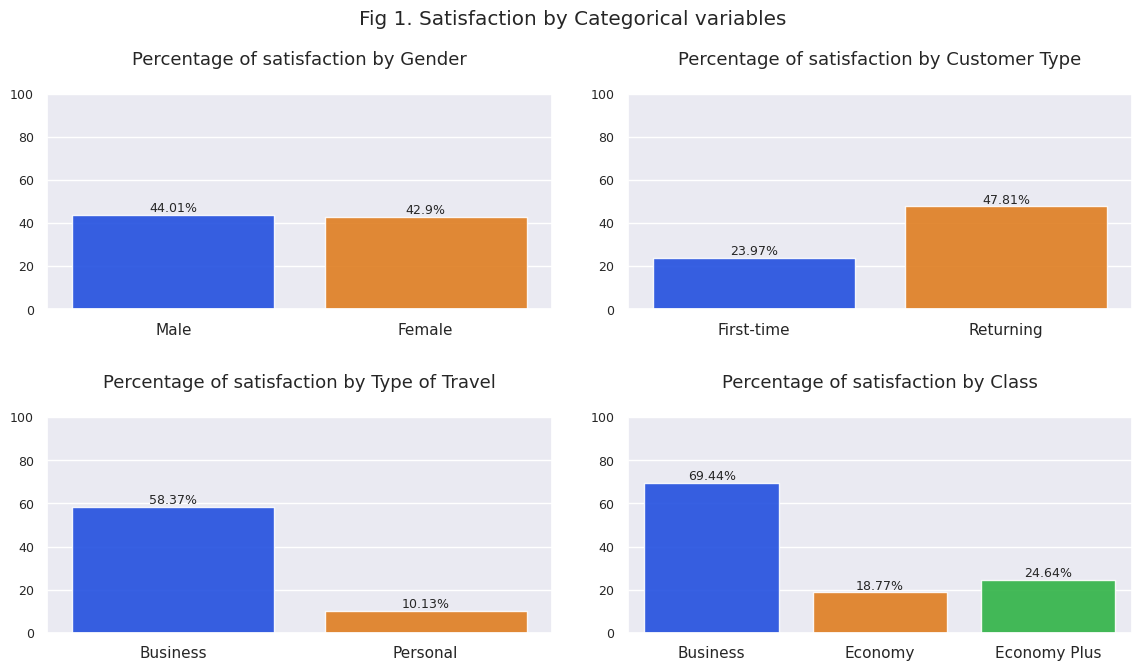

In [14]:
fig, axis = plt.subplots(2,2, figsize=(14,7))

# Reshaping to iterate for only one dimention
axis = axis.reshape(-1,)

for ax, c_v, s_p_v in zip(axis, categorical_variables, satisfaction_per_variables):
    sns.barplot(x=s_p_v[0], y=s_p_v[1], ax=ax, alpha=0.9)
    ax.set_title(f"Percentage of satisfaction by {c_v}\n", size=13)
    ax.set_ylim(0, 100)
    ax.tick_params(axis="y", labelsize=9)
    
    # Adding text on top of the bars
    labels_on_bars = [str(pcg) + "%" for pcg in s_p_v[1]]
    ax.bar_label(ax.containers[0], labels=labels_on_bars, size=9)

fig.subplots_adjust(wspace=0.15, hspace=0.5)
# All the fig numbers will be added in the title just for ease
fig.suptitle("Fig 1. Satisfaction by Categorical variables\n", y=1)
plt.show()

Excluding gender, there is a large difference in the level of satisfaction by variable, for example, those flying for business reasons (_Type of travel_ 58.37%) rated the airline better than those flying for personal reasons (10.13%). The same pattern was observed for passengers flying **Business** _class_ (69.44%) and **Returning** passengers (47.81%). In adittion, apparently the **Economy Plus** class is just slighty better than the **Economy** _class_.

On the other hand, factors such as flight distance could affect the perception of flight experience, in our case, is this reflected in satisfaction?

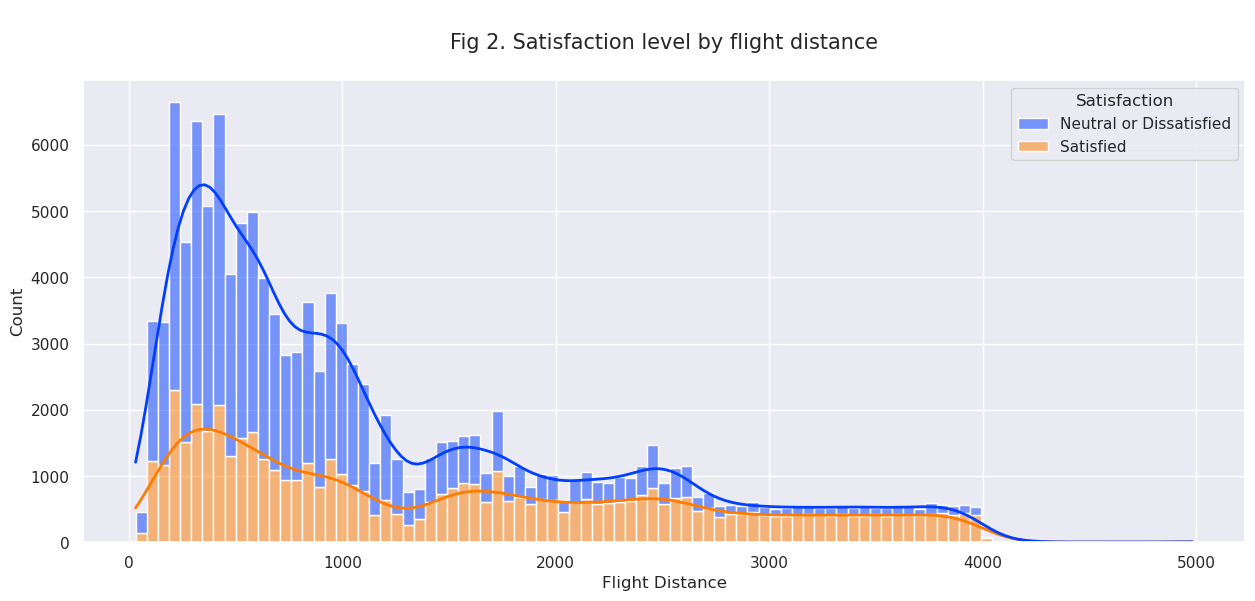

In [15]:
fig, axis = plt.subplots(1,1, figsize=(15,6))

sns.histplot(data=airline_info_df, x="Flight Distance",
             hue="Satisfaction", ax=axis, linewidth=1,
             kde=True, multiple="stack", line_kws={"lw":2})

axis.set_title("\nFig 2. Satisfaction level by flight distance\n", fontdict={"size":15})
plt.show()

Most passengers take flights of less than approx. 1000 miles and we find that the majority of **Neutral or Dissatisfied** passengers are in this range. In fact, the longer the flight distance, the higher the satisfaction, shown by lower blue bars and higher orange bars.

Now lets take a look of the services found in the airline and the rating of the services

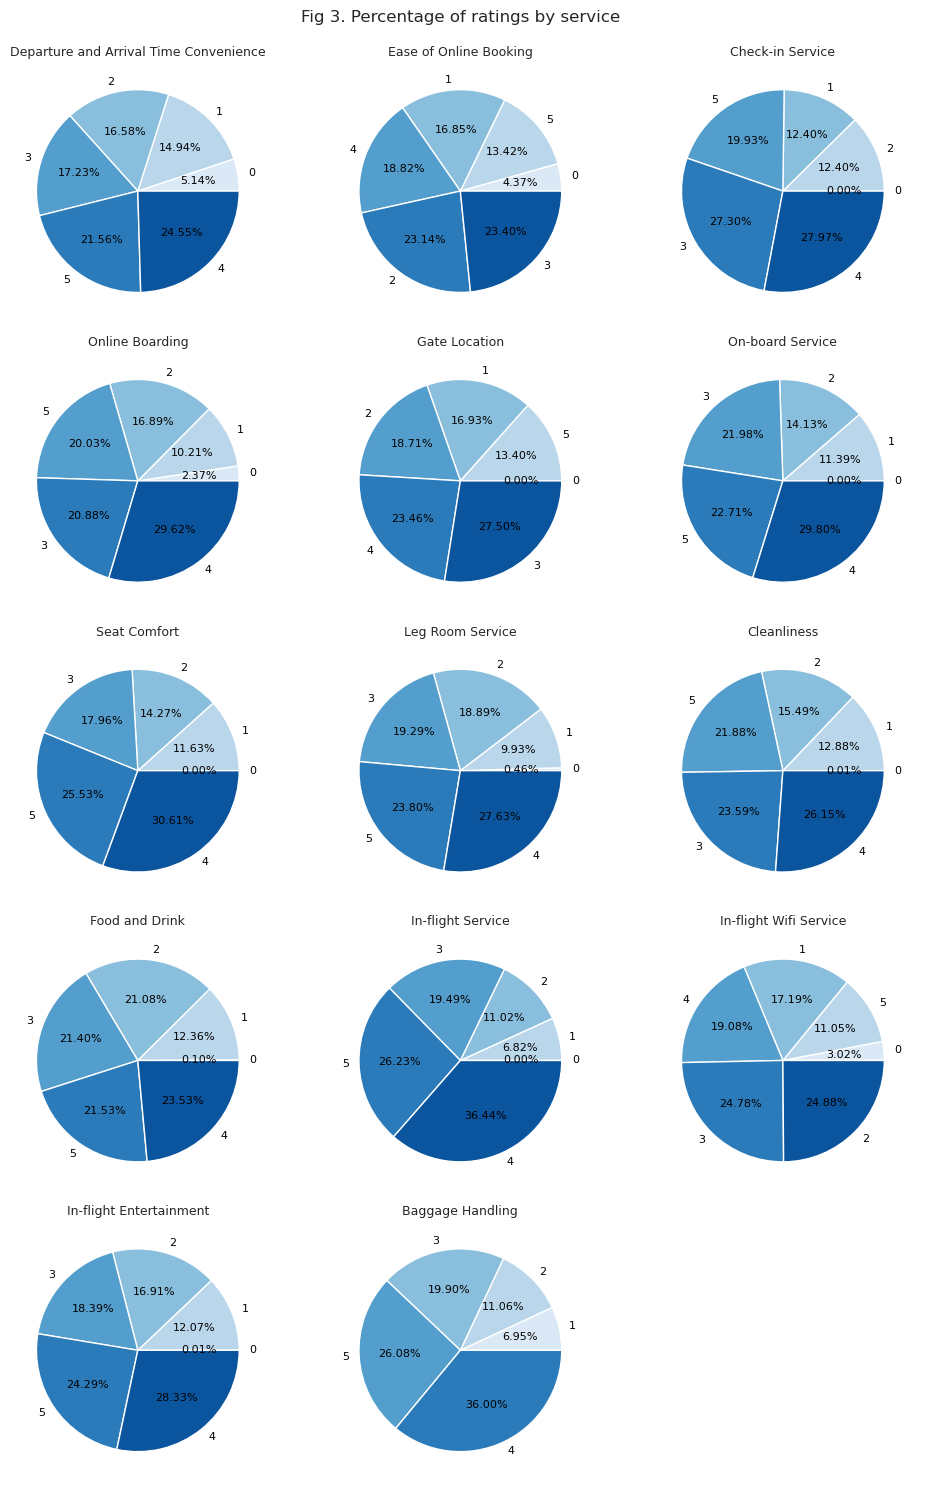

In [16]:
fig, axis = plt.subplots(5, 3, figsize=(10, 15), sharey=True)

# Reshaping to iter using only 1 for loop
axis = axis.reshape(-1,)
palete_colors = sns.color_palette("Blues", n_colors=6)

airline_info_df_services = airline_info_df[col_names_ordinal_type]

for ax, column in zip(axis, col_names_ordinal_type):

    # Getting counts by service
    satisfaction_level_by_services = airline_info_df_services[column].value_counts()
    satisfaction_level_by_services = satisfaction_level_by_services.sort_values()

    ax.pie(satisfaction_level_by_services.values, labels=satisfaction_level_by_services.index,
            autopct="%.2f%%", textprops={"size": 8, "color":"black"},
            colors=palete_colors)
    
    ax.set_title(column, fontdict={"size":9})

axis[-1].axis("off")

fig.suptitle("Fig 3. Percentage of ratings by service", y=0.99, size=12)
fig.tight_layout()
plt.show()

Some services are remarkable, as you can see, but others not so much. 

Approx. 60% of the people rate with 4 and 5 the service of _Baggage Handling_ indicating a good service, similar to _In-flight service_ and 50% approx rated the _In-flight Entertainment_, _Food and Drink_, _Departure and Arrival Time convenience_, _On-board service_, _Seat comfort_ and _Leg Room Service_ with 4 and 5.

On the other hand, the worst services are _Easy of Online Booking_ with only 13.42% of the passengers rating with 5 and approx. 50% of them with 3 and 2 and we also have _In-flight Wifi Service_ rating 5 only 11.05% and 3 and 2 approx 50%

How are those services related? Lets do an spearman correlation

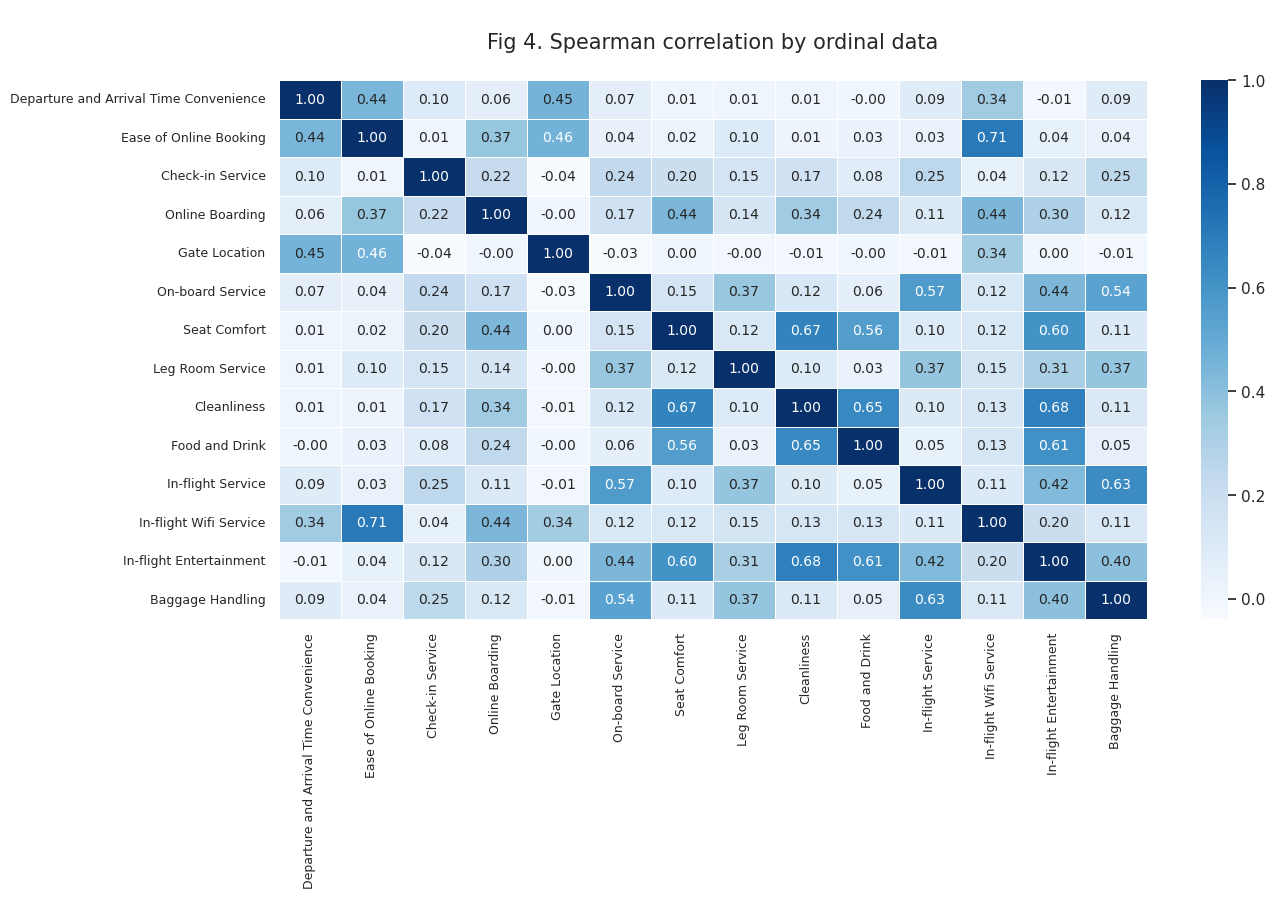

In [17]:
corr_spearman = airline_info_df[col_names_ordinal_type].corr(method="spearman")

fig, axis = plt.subplots(1,1, figsize=(14,7))

sns.heatmap(corr_spearman, annot=True, fmt=".2f", linewidth=0.5,
            annot_kws={"size":10}, ax=axis,
            cmap="Blues")

axis.tick_params(axis='y', labelsize=9)
axis.tick_params(axis='x', labelsize=9)
axis.set_title("\nFig 4. Spearman correlation by ordinal data\n", fontdict={"size":15})
plt.show()

The most correlated service is the _In-flight Wifi Service_ and _Ease of Online Bookin_ with a score of 0.71. This relationship could be due to passengers trying to make a booking or checking related issues during the flight, a bad wifi signal will certainly affect the experience when trying to make the other. Other correlated variables are _Baggage Handling_ and _In-flight Service_ with 0.63, which could make sense, since _Baggage Handling_ is part of one of the services provided by the airline.

Another related service is _Cleanliness_, along with _In-flight Entertainment_, _Food and Drink_, and _Seat Comfort_, with scores of 0.68, 0.65, and 0.67, respectively. The relation between _Cleanliness_ and _Food and Drink_ is easy to visualize. A clean environment could also make your travel experience more comfortable, which could explain the relation with _Seat Comfort_. However, between _Cleanliness_ and _In-flight Entertainment_ it's not clear what could happen there.

_In-flight Entertainment_ at the same time is correlated to _Food and Drink_ and _Seat Comfort_ with scores of 0.61 and 0.60, respectively. Perhaps because there is not an option to rate the quality of the installations, they end up in the _In-flight Entertainment service_ category, which could explain the relation with _Seat Comfort_ and _Cleanliness_, and therefore, with the _Food and Drink_ category

At the end, correlation only shows variables having a similar behavior, but it doesn't show if one variable is the reason for the behavior of the other and vice versa. A deeper exploration should be done to try to explain those relationships.

Meanwhile, what are the services most important at the moment to determine if the passenger is satisfied or not after their flight? To answer that, I'll create a Random Forest model which is capable of calculating a score for the importance of features to determine the positive class, or in this case, the importance of services in determining satisfaction.

The point of this is not to create a model to predict whether or not the passenger will be satisfied based on the rating, and hyperparameter tuning or cross-validation techniques won't be applied if that is not neccesary.

In [18]:
X = airline_info_df[col_names_ordinal_type].to_numpy()

# Converting into dummy
y = airline_info_df["Satisfaction"].apply(lambda x: 1 if x == "Satisfied" else 0).to_numpy()

# Train/test of 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=13)

print(f"Train size: {X_train.shape}")
print(f"Test size: {X_test.shape}")

Train size: (90916, 14)
Test size: (38964, 14)


In [19]:
clf_random_forest = RandomForestClassifier()
clf_random_forest.fit(X_train, y_train)

predict = clf_random_forest.predict(X_test)

print(f"Precision: {precision_score(y_test, predict)}")
print(f"Recall: {recall_score(y_test, predict)}")
print(f"Accuracy: {accuracy_score(y_test, predict)}")
print(f"F1-score: {f1_score(y_test, predict)}")

Precision: 0.9520805531966517
Recall: 0.9228055735199012
Accuracy: 0.9460271019402525
F1-score: 0.9372145096283029


In [20]:
positive_class = y_test[y_test == 1].shape[0]
negative_class = y_test[y_test == 0].shape[0]

print(f"Positive class: {positive_class}")
print(f"Negative class: {negative_class}")
print("Matrix")
print(confusion_matrix(y_test, predict, labels=[1,0]))

Positive class: 17009
Negative class: 21955
Matrix
[[15696  1313]
 [  790 21165]]


The model has a good performance and our classes are balanced, so we can trust in the feature scores

In [21]:
# Retrieving most important features according to randomForest and parsing
feature_importances = clf_random_forest.feature_importances_
feature_importances = pd.DataFrame([feature_importances, col_names_ordinal_type]).T

feature_importances.rename({0:"Score",1:"Variable"}, axis=1, inplace=True)
feature_importances.sort_values(by="Score", ascending=False, inplace=True)

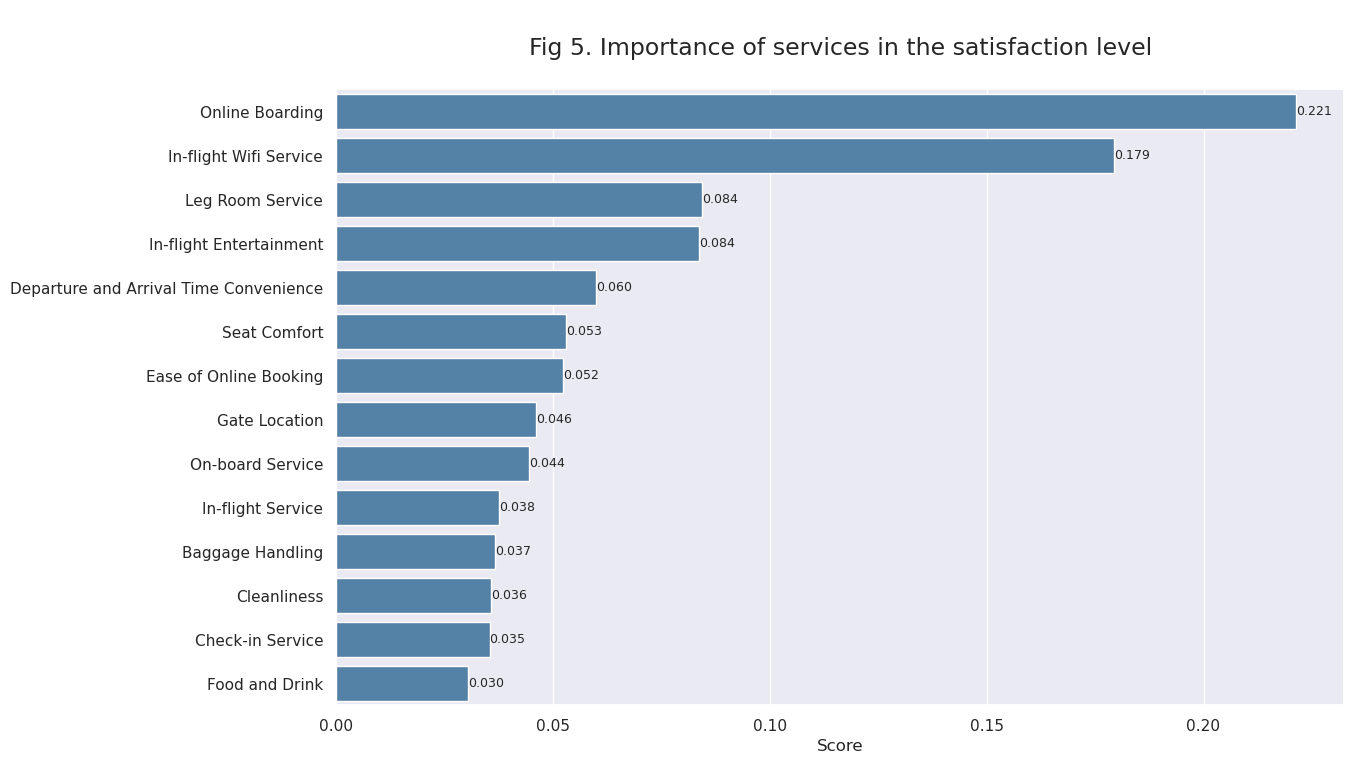

In [22]:
fig, axis = plt.subplots(1,1, figsize=(13,8))

sns.barplot(data=feature_importances, y="Variable", x="Score",
            color="steelblue", ax=axis)

axis.bar_label(axis.containers[0], size=9, fmt="%.3f")
axis.set_ylabel("")
axis.set_title("\nFig 5. Importance of services in the satisfaction level\n", fontdict={"size":17})
plt.show()

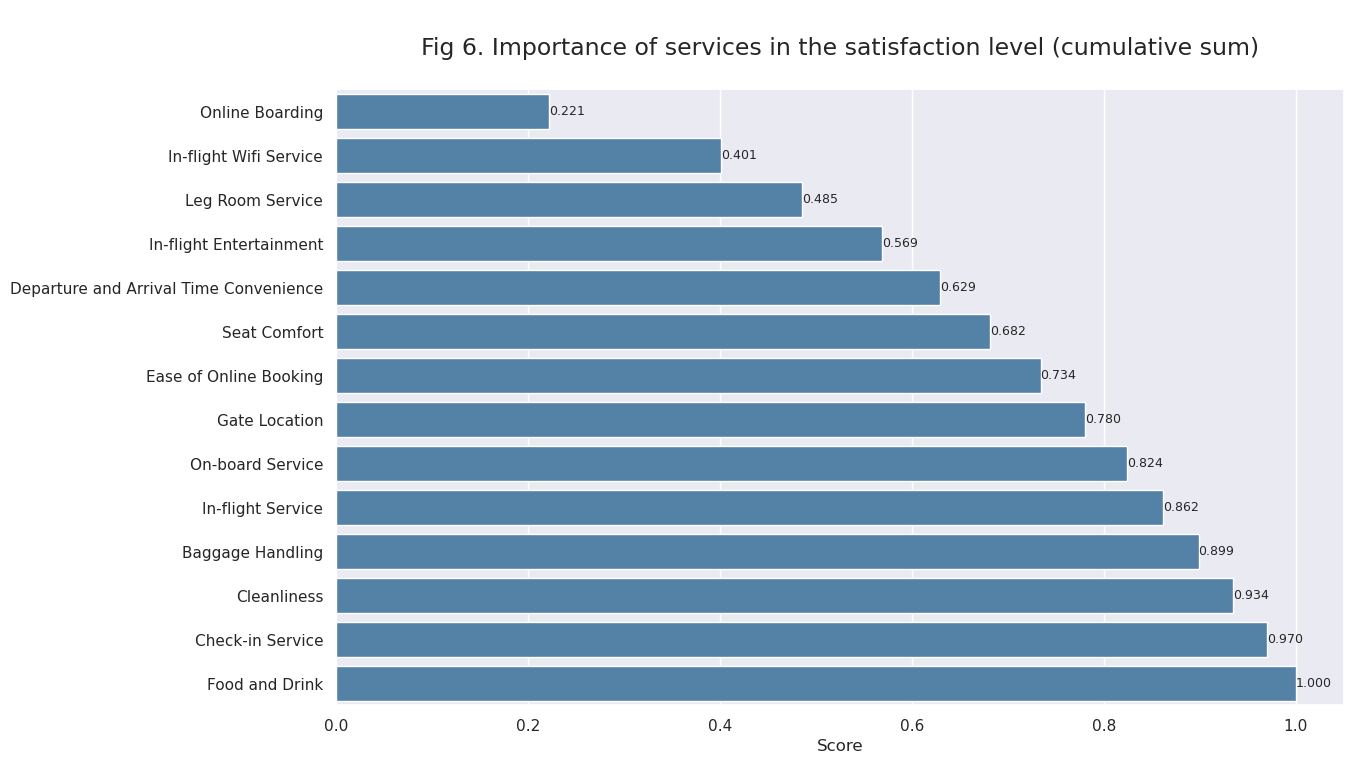

In [23]:
fig, axis = plt.subplots(1,1, figsize=(13,8))

sns.barplot(y=feature_importances["Variable"], x=feature_importances["Score"].cumsum(),
            color="steelblue", ax=axis)

axis.bar_label(axis.containers[0], size=9, fmt="%.3f")
axis.set_ylabel("")
axis.set_title("\nFig 6. Importance of services in the satisfaction level (cumulative sum)\n", fontdict={"size":17})
plt.show()

_Online Boarding_ and _In-flight Wifi Service_ are the two most important elements to determine if the passenger will be satisfied or not (Fig 5.), but, at the same time, _In-flight Wifi Service_ is one of the worst rated (49.66% for ratings of 3 and 2) and _Online Boarding_ is not one of the best as shown in the Fig 3.

In turn, _Baggage Handling_ was the best rated service, but again, not among the most important.

Additionally, it is curious that _Food and Drink_ and _Cleanliness_ are correlated with _In-flight Entertainment_ (Fig 4.) but _Food and Drink_ and _Cleanliness_ are among the least important characteristics in determining satisfaction, in turn, _Food and Drink_ are one of the services with the best ratings of all the other categories (Fig 3.). Similarly, _In-flight Service_ is one of the best rated but, again, not as important in determining whether the passenger will be satisfied with the flight.

On the other hand, only four features contribute more than half of the weight in the model (0.559; Fig 6), beyond the already mentioned _Online Boarding_ and _In-flight Wifi Service_, the _In-flight Entertainment_ and the _Leg Room Service_ also have good scores (Fig 3.). Still, let's remember that the service with the best scores (_Baggage Handling_ for scores of 4 and 5) achieved only a percentage of 60% (Fig 3.)

I think at this point we have a good understanding of how satisfaction level and services behave, but we have left our categorical variables aside a bit, let's take a look at them and see how they behave with each other.

### Passenger behavior

Similar to what we did in Fig 1. We'll do the same among the categorical variables and some numeric ones

In [24]:
customer_information_cols = ["Gender", 
                             "Age",
                             "Type of Travel",
                             "Class",
                             "Flight Distance",
                             "Customer Type"]

customer_information_df = airline_info_df[customer_information_cols]
customer_information_df.head()

,Gender,Age,Type of Travel,Class,Flight Distance,Customer Type
0,Male,48,Business,Business,821,First-time
1,Female,35,Business,Business,821,Returning
2,Male,41,Business,Business,853,Returning
3,Male,50,Business,Business,1905,Returning
4,Female,49,Business,Business,3470,Returning


In [25]:
# Let's build barplots for the categorical data
# Filtering those of object type
mask_categorial_columns = customer_information_df.dtypes == "object"
categorical_columns = customer_information_df.dtypes[mask_categorial_columns].index
numeric_columns = customer_information_df.dtypes[~mask_categorial_columns].index

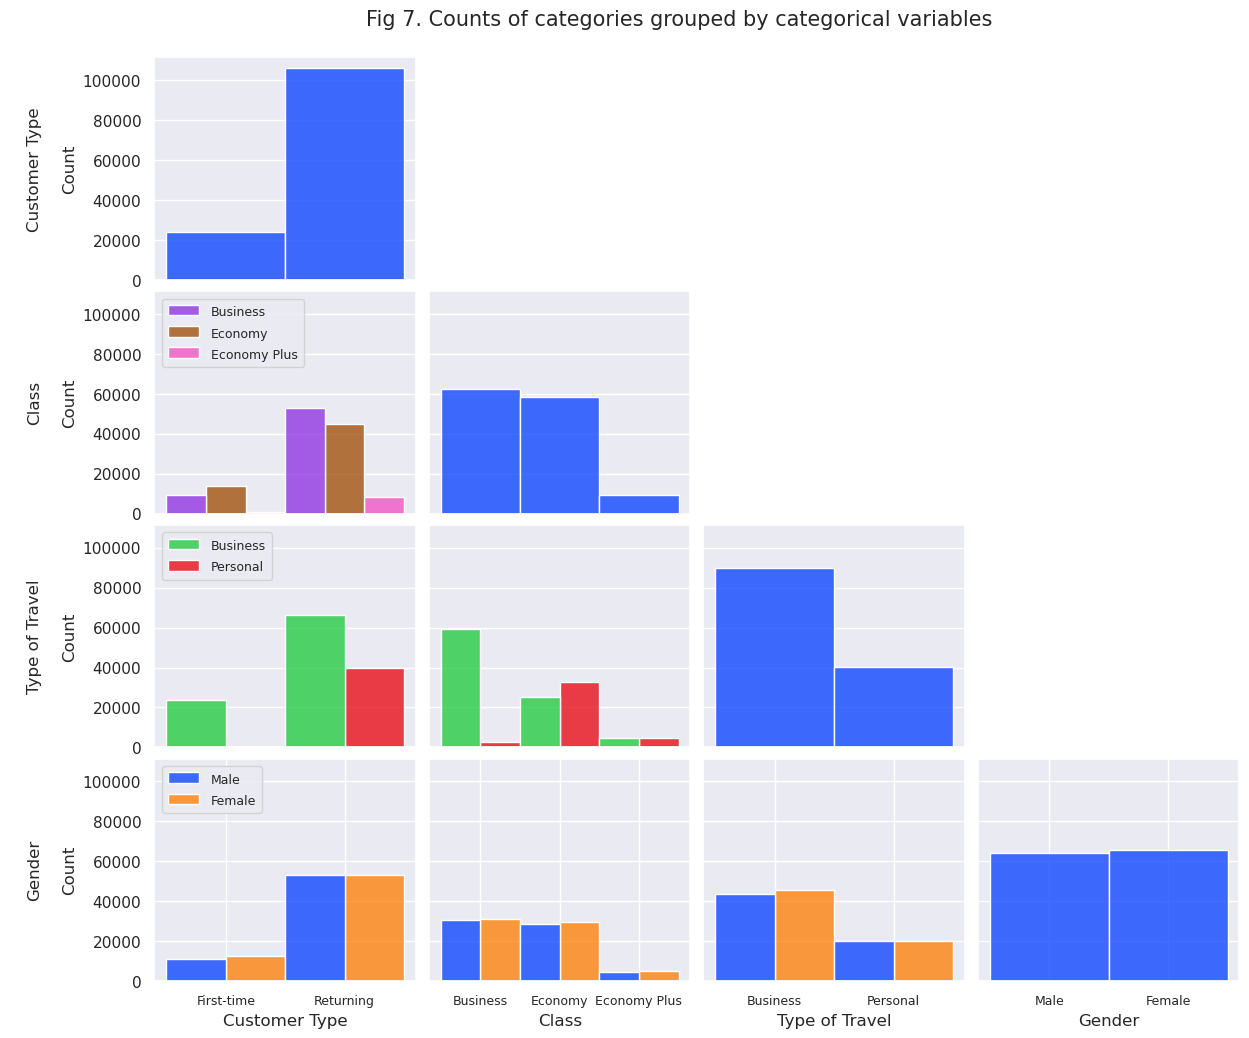

In [26]:
# Iterating from the bottom to the top of the subplots and from the right to the left
reversed_array = np.arange(categorical_columns.shape[0] - 1, -1, -1)

# it'll be explored every unique value in each categorical variable
unique_categorical_values = airline_info_df[categorical_columns].nunique()
palete_colors = sns.color_palette("bright", n_colors=unique_categorical_values.sum())
palete_colors = list(palete_colors)

fig, axis = plt.subplots(categorical_columns.shape[0], categorical_columns.shape[0],
                         figsize=(14, 12), sharey=True)

for i, column_i in zip(reversed_array, categorical_columns):
    for j, column_j in zip(reversed_array, categorical_columns):

        # Digonal plots
        if i == j:
            sns.histplot(x=customer_information_df[column_j], ax=axis[i,j])
        # Upper tringular matrix
        elif j > i:
            axis[i,j].axis("off")
        # Everything else
        else:
            
            choose_n_colors = unique_categorical_values[column_i]
            
            sns.histplot(x=customer_information_df[column_j],
                        hue=customer_information_df[column_i],
                        stat="count", multiple="dodge",
                        ax=axis[i,j], palette=palete_colors[:choose_n_colors])
            
            # Formating the display of the legend
            if j > 0:
                axis[i,j].get_legend().remove()
            else:
                sns.move_legend(axis[i,j], "upper left")
                axis[i,j].set_ylabel(f"\n{column_i}\n\nCount")
                plt.setp(axis[i,j].get_legend().get_texts(), fontsize=9)
                axis[i,j].get_legend().set_title("")

        # Removing x labels except for the plots located at the bottom
        if i < (categorical_columns.shape[0] - 1):
            axis[i,j].axes.get_xaxis().set_visible(False)
        else:
            axis[i,j].tick_params(axis='x', labelsize=9)

    palete_colors = palete_colors[choose_n_colors:]

axis[i,j].set_ylabel(f"\n{column_i}\n\nCount")
fig.subplots_adjust(wspace=0.05, hspace=0.05)
fig.suptitle("Fig 7. Counts of categories grouped by categorical variables", y=0.92, size=15)
plt.show()

Similar to Fig 1. about the gender satisfaction, here we see similar values for both genders meaning there are not a difference in the passengers taking flights in this airline. In the case of the _Type of Travel_, most passengers travel for **Business** purposes, the passengers also use significantly more the **Business** and **Economy** _class_ and most of the passengers status are **Returning**

Similar to Fig 1. about gender satisfaction, here we see similar values for both genders, meaning there is no difference in the passengers taking flights in this airline. In the case of the _Type of Travel_, most passengers travel for **Business** purposes. The passengers also use significantly more the **Business** and **Economy** _class_. Most of the passengers' status is **Returning**.

Regarding the Type of Travel, most people **Returning** did it for **Business** travel, and it seems that just a few passengers who were **First-time** travelers took the flight for _Personal_ motives. Most people traveling by **Business** _class_ did it for **Business** purposes, and the few people traveling using the **Economy Plus** _class_ did it for both purposes. In addition, passengers returning took similar **Business** and **Economy** _class_.

Now lets take a look to Age and Flight Distance behavior of the passengers

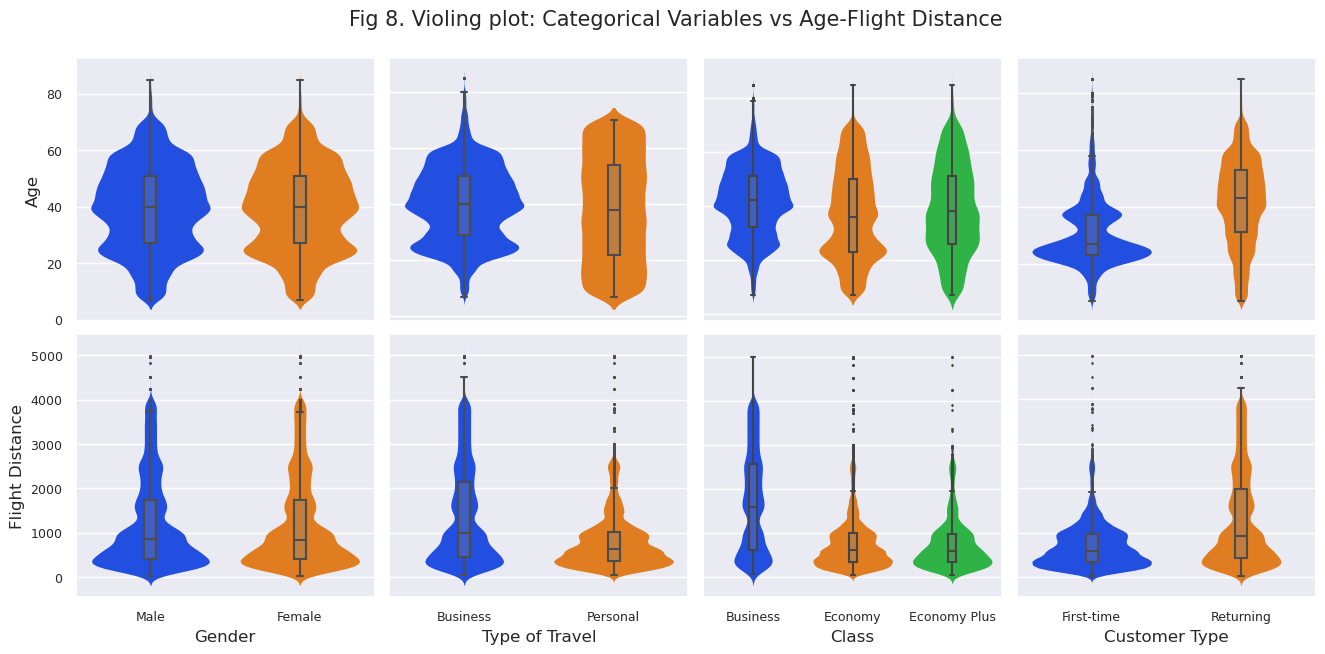

In [27]:
#numeric_columns = numeric_data_columns

fig, axis = plt.subplots(numeric_columns.shape[0], categorical_columns.shape[0],
                        figsize=(16,7))

for i, row_name in enumerate(numeric_columns):
    for j, col_name in enumerate(categorical_columns):
        
        # Customizing manually boxplot on top of violin plot for a better display
        sns.boxplot(data=customer_information_df, x=col_name,
                    y=row_name, ax=axis[i,j],
                    saturation=0.5, width=0.08,
                    boxprops={'zorder': 2}, fliersize=1)
        
        sns.violinplot(data=customer_information_df, x=col_name,
                        y=row_name, ax=axis[i,j],
                        linewidth=0, inner=None)

        # Formatting the display or not of the x axis
        if i != (numeric_columns.shape[0] - 1):
            axis[i,j].axes.get_xaxis().set_visible(False)
        else:
            axis[i,j].tick_params(axis='x', labelsize=9)
        
        # Formatting the display or not of the y axis
        if j > 0:
            axis[i,j].set_yticklabels([])
            axis[i,j].set_ylabel("")
        else:
            axis[i,j].tick_params(axis='y', labelsize=9)


fig.suptitle("Fig 8. Violing plot: Categorical Variables vs Age-Flight Distance", y=0.95, size=15)
fig.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

We can see, again, there is no difference about the _Age_ and _Flight Distance_ by _Gender_.

On the other hand, **First-time** customers rarely take longer flights and are usually younger than 40 years old, which is not the case for returning passengers.

By _Type of Travel_, we can see that _Age_ is more or less equally distributed for **Personal** travel. However, for **Business** purposes, there are two clear peaks at 40 and approximately 25 years old, where most of the passengers fall in the age range of 20 to 60. In addition, people traveling for **Business** purposes usually took longer flights, as shown by a longer tail, even though many passengers prefer shorter travel distances.

Similar to the _Type of Travel_, passengers taking **Business** _Class_ took longer flights than those in **Economy** and **Economy Plus**. Let's remember that the level of satisfaction is greater for passengers traveling in **Business** _Class_ and for **Business** purposes, as shown in Fig. 1. At the same time, passengers taking longer flights are also more satisfied (Fig. 2). This phenomenon could be explained by the better quality of service offered in **Business** _Class_ for **Business** purposes travels (Fig. 7) when traveling long distances. Does is it true? lets check it out!

First, let's create a function to obtain the percentage of satisfaction by each services as shown below and we are going to compare those with the general percentages found in Fig 3.

In [28]:
def SatisfactionPcgByColumn(df:pd.DataFrame, column_target:int|str, label:str|int) -> pd.DataFrame:
    
    '''
    This function computes the percentage of the values found in some column of a pandas DataFrame
    
    Parameters
    ----------
    
    df: pandas.DataFrame
        pandas.DataFrame to compute the percentages
    
    column_target:
        Name of the colum of interest
    
    label:
        Value to add as a new column
    
    Return
    ------
    
    pd.DataFrame: Frame containing the percentages of the counts according to column_target
    
    '''
    
    new_df = pd.DataFrame()
    
    df = 100 * df[column_target].value_counts() / df.shape[0]
    df = df.sort_values()
    
    new_df["Rate"] = df.index
    new_df["Percentage"] = df.values
    new_df["Type"] = label
    
    return new_df

Now, let's filter the **Business** data. As we already know the most important features to decide if the passenger will felt satisfied with the flight, we'll be working only with the top 6 most important services.

In [29]:
mask = (airline_info_df["Type of Travel"] == "Business") & (airline_info_df["Class"] == "Business")
airline_services_business = airline_info_df[mask]

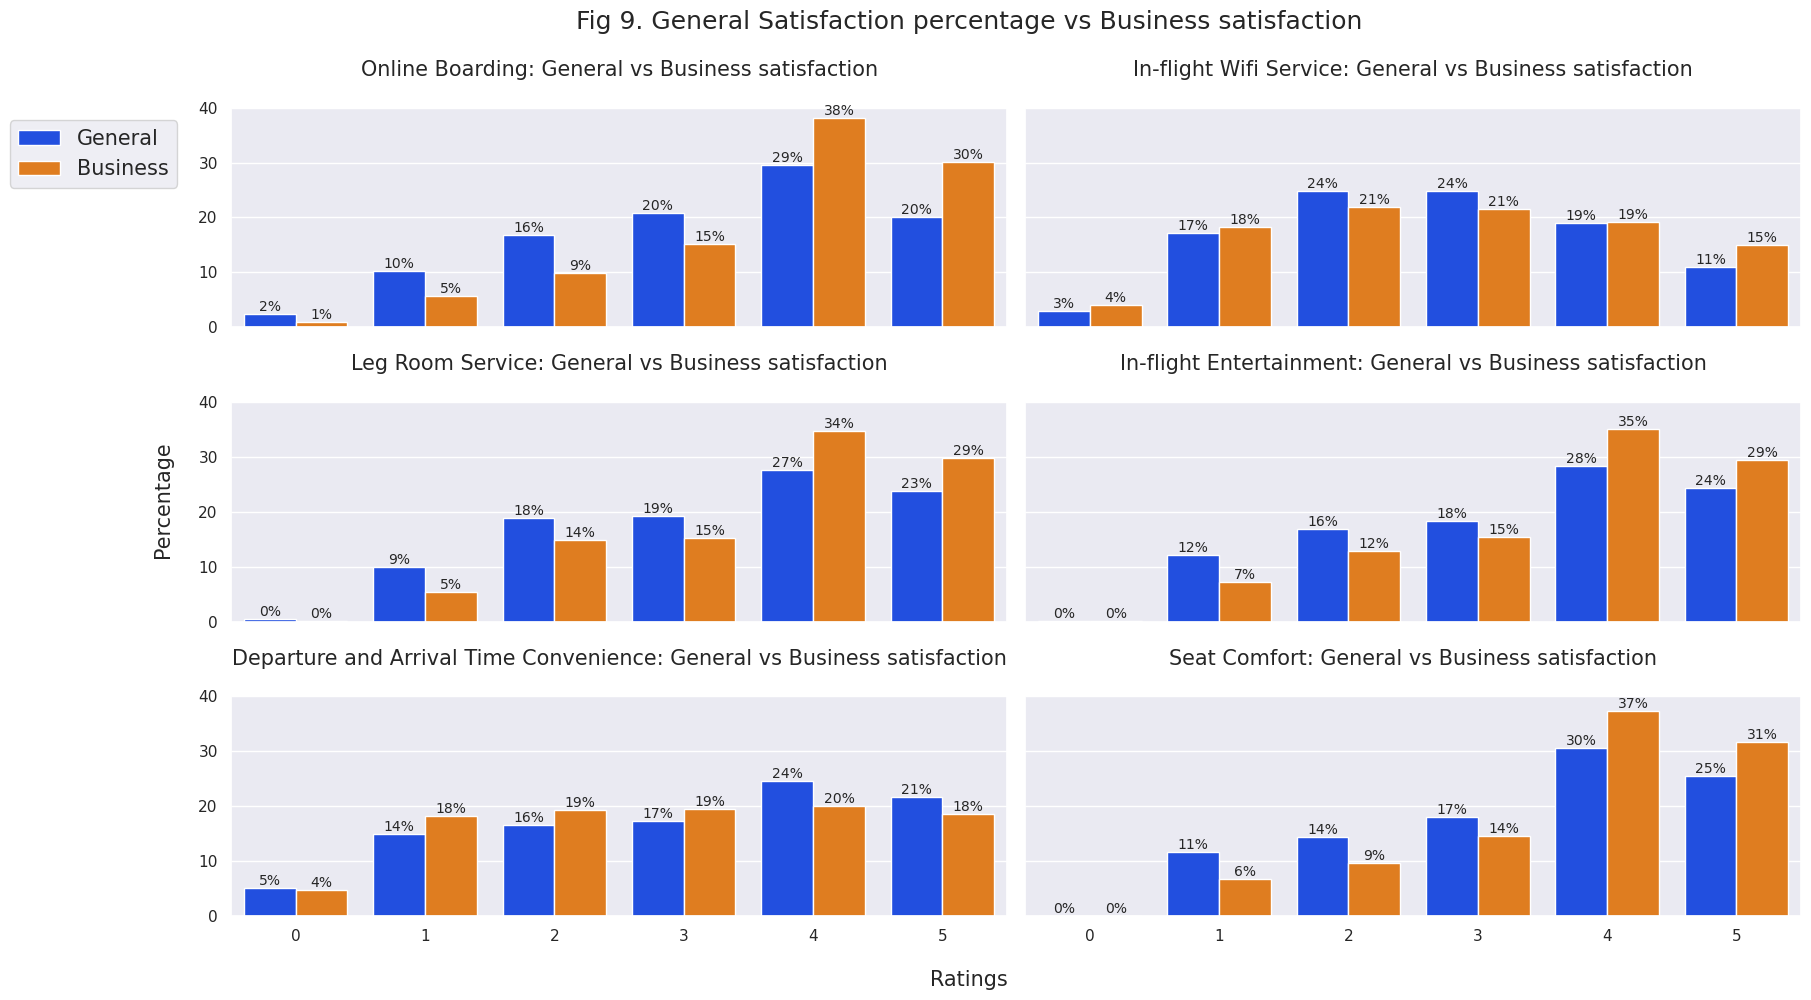

In [30]:
top_6_features_names = feature_importances["Variable"].iloc[:6]

fig, axis = plt.subplots(3, 2, figsize=(17,10), 
                         sharex=True, sharey=True)

axis = axis.reshape(-1,)

for ax, column in zip(axis, top_6_features_names):
    
    # Creating only one DataFrame to hue later with sns
    merge_1 = SatisfactionPcgByColumn(airline_info_df, column, "General")
    merge_2 = SatisfactionPcgByColumn(airline_services_business, column, "Business")
    
    merge = pd.concat([merge_1, merge_2])
    
    sns.barplot(data=merge, x="Rate", y="Percentage", hue="Type", ax=ax)
    
    # Formatting labels on top of the both bars
    labels_1 = [str(int(value)) + "%" for value in ax.containers[0].datavalues]
    ax.bar_label(ax.containers[0], labels=labels_1, size=10)
    labels_2 = [str(int(value)) + "%" for value in ax.containers[1].datavalues]
    ax.bar_label(ax.containers[1], labels=labels_2, size=10)
    
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.set_title(f"{column}: General vs Business satisfaction\n", size=15)
    
    # Saving and removing all the labels to place only one at the end
    handles, labels = ax.get_legend_handles_labels()
    ax.legend_.remove()

fig.suptitle("Fig 9. General Satisfaction percentage vs Business satisfaction", y=0.99, size=18)
fig.legend(handles, labels, bbox_to_anchor=(0.04,0.89), fontsize=15)
fig.supxlabel('Ratings', fontsize=15)
fig.supylabel('Percentage\n', fontsize=15)
fig.tight_layout()

plt.show()

We can see that, with the exception of **Departure and Arrival Time Convenience**, the other services are better rated, for example, 68% of passengers rated the **Online Boarding** service with 4 and 5 in **_Business_**, compared to 49% overall satisfaction of the same service for ratings of 4 and 5. Similar cases occur with **In-flight Wifi Service** (34% **_Business_** vs 30% **_General_**); **Leg Room Service** (63% vs 50%); **In-flight Entertainment** (64% vs 52%) and **Seat Comfort** (68% vs 55%).

## Conclusions

In conclusion, some key insights from this data set are as follows:

* The proportion of men and women remains more or less similar and is not a key variable.

* The overall satisfaction level is 43%.

* The level of passenger satisfaction varies significantly depending on passenger preferences, being higher if they are not first-time passengers (47.81%), fly for **Business** purposes (58.37%) or preferred to travel in **Business** _class_ (69.44%). 

* Passenger satisfaction increases the longer the flight distance, as passengers prefer to travel in the **Bussiness** _class_ which offers better quality services at least in 5 out 6 most important services.

* The worst service is _Easy of Online Booking_ being rated 5 only 13.42% of the time.

* The best service is _Baggage Handling_ being rated 60% of the time with 4 and 5.

* There is a strong correlation between the score of some services, with the highest score of 0.71 being _In-flight Wifi Service_ and _Ease of Online Bookin_. Other notable ones are between _Cleanliness_, along with _In-flight Entertainment_, _Food and Drink_, and _Seat Comfort_, ( scores of 0.68, 0.65, and 0.67 respectively) and _In-flight Entertainment_ with _Food and Drink_ and _Seat Comfort_ (0.61 and 0.60 respectively). This correlation is not reflected when determining overall passenger satisfaction.

* The four key services when determining passenger satisfaction are _Online Boarding_, _In-flight Wifi Service_, _In-flight Entertainment_ and _Leg Room Service_ (0.220, 0.185, 0.079 and 0.077 respectively) with a total score of 0.559, but _In-flight Wifi Service_ is one of the worst rated services (49.66% of the time rated 3 and 2).

* Most of the passengers are **Returning**

* Passengers hardly fly using the **Economy Plus** _class_

* Most passengers fly for **Business** purposes

* Almost all passengers flying for **Business** purposes fly using **Business** _class_ and it is not uncommon for them to take long trips.

* **First-time** passengers do not usually take long trips and are under 40 years of age.

* Most of the passengers are between 20 and 60 years old.